### Logistic Classifier for CIFAR-10

In [1]:
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

import helpers
from Cifar10 import Cifar10

In [2]:
# device configuration
# device = torch.device('mps' if torch.backends.mps.is_available() else ('cuda' if torch.cuda.is_available() else 'cpu'))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

print(f'Using device {device}')

# consitency in training
torch.manual_seed(1234)
random.seed(1234)

Using device cuda


In [3]:
# Load data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = Cifar10(train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = Cifar10(train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Hyperparameters for LogReg model:
- solver
- loss function
- epochs
- learning rate

Solvers: 
- Adam
- SGD

Loss functions:
- L1 Loss
- MSE Loss (L2)
- CrossEntropyLoss


In [14]:
# define Logistic Classifier

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.log_layer = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),
            nn.Sigmoid()
        )

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = self.log_layer(x)
        return x


In [15]:
net = Net().to(device)

# Hyper Parameters
num_epochs = 3
learning_rate = 0.001

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# optimizer = optim.Adam(net.parameters(), lr=learning_rate)

loss_vals, tr_acc, te_acc  = helpers.train_model(net, trainloader, testloader, device, criterion, optimizer, num_epochs)

helpers.evaluate(net, testloader, device)

starting training
[1,  2000] loss: 6.599 tr acc: 0.295 te acc: 0.292
[1,  4000] loss: 6.507 tr acc: 0.301 te acc: 0.294
[1,  6000] loss: 6.478 tr acc: 0.309 te acc: 0.305
[1,  8000] loss: 6.448 tr acc: 0.292 te acc: 0.286
[1, 10000] loss: 6.425 tr acc: 0.299 te acc: 0.294
[2,  2000] loss: 6.406 tr acc: 0.295 te acc: 0.292
[2,  4000] loss: 6.384 tr acc: 0.307 te acc: 0.304
[2,  6000] loss: 6.372 tr acc: 0.308 te acc: 0.304
[2,  8000] loss: 6.363 tr acc: 0.307 te acc: 0.310
[2, 10000] loss: 6.355 tr acc: 0.311 te acc: 0.311
[3,  2000] loss: 6.341 tr acc: 0.308 te acc: 0.307
[3,  4000] loss: 6.333 tr acc: 0.310 te acc: 0.308
[3,  6000] loss: 6.329 tr acc: 0.311 te acc: 0.310
[3,  8000] loss: 6.326 tr acc: 0.306 te acc: 0.301
[3, 10000] loss: 6.317 tr acc: 0.304 te acc: 0.304
Finished Training


0.3044

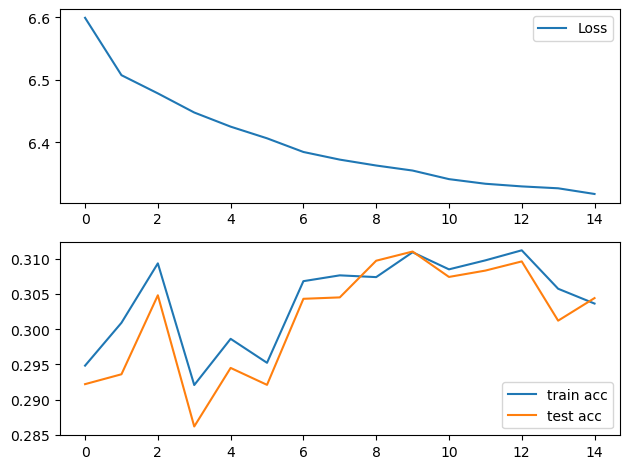

In [17]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(range(len(loss_vals)), loss_vals, label='Loss')
ax2.plot(range(len(loss_vals)), tr_acc, label='train acc')
ax2.plot(range(len(loss_vals)), te_acc, label='test acc')

ax1.legend()
ax2.legend()

plt.title('')
plt.show()